<a href="https://colab.research.google.com/github/SamuelDunn-hub/PersonalProjects/blob/main/BDAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv("CarPriceBDAA.csv")
df.head()


,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
1,2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
2,4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
3,7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
4,8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399


In [69]:
print(df.shape)
print(df.isna().sum())

(2095, 14)
Unnamed: 0            0
name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
seats                 0
max_power (in bph)    0
Mileage Unit          0
Mileage               0
Engine (CC)           0
dtype: int64


In [53]:
# Keep relevant columns
cols = ['year', 'selling_price', 'km_driven', 'Mileage', 'Engine (CC)', 'seats']
data = df[cols].dropna()

# Log-transform the target variable
data['log_price'] = np.log(data['selling_price'])

In [54]:
# Define features and target
X = data[['year', 'km_driven', 'Mileage', 'Engine (CC)', 'seats']]
y = data['log_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [56]:
# Predict on test set
y_pred_log = model.predict(X_test_scaled)

# Convert back to normal prices
y_pred = np.exp(y_pred_log)
y_test_original = np.exp(y_test)

# Evaluate model
print("R² Score:", r2_score(y_test_original, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test_original, y_pred)))
print("MAE:", mean_absolute_error(y_test_original, y_pred))

R² Score: 0.7666490584365542
RMSE: 105026.16158268938
MAE: 69271.27949471383


In [57]:
# Coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nModel Coefficients:")
print(coef_df)


Model Coefficients:
       Feature  Coefficient
0         year     0.350268
1    km_driven    -0.050421
2      Mileage     0.025018
3  Engine (CC)     0.280836
4        seats     0.068735


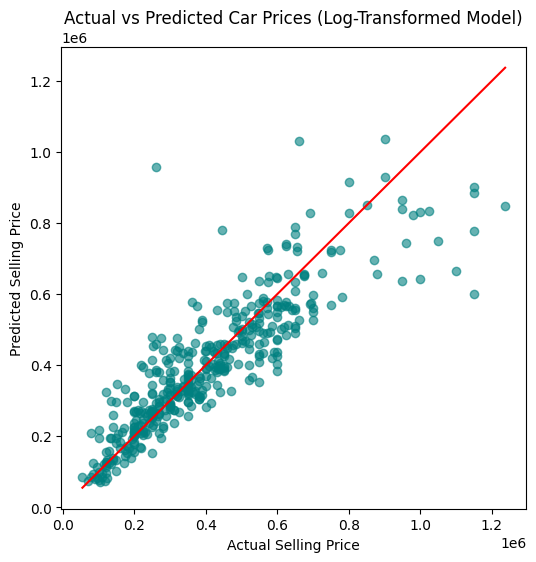

In [70]:
# plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test_original, y_pred, alpha=0.6, color='teal')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices (Log-Transformed Model)")
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()], color='red')
plt.show()

In [71]:
test_car = pd.DataFrame({
    'year': [2018],
    'km_driven': [45000],
    'Mileage': [20.5],
    'Engine (CC)': [1200],
    'seats': [5]
})

test_car_scaled = scaler.transform(test_car)
predicted_price_log = model.predict(test_car_scaled)[0]
predicted_price = np.exp(predicted_price_log)
print(f"\n💰 Predicted selling price for the test car: ${predicted_price:,.0f}")


💰 Predicted selling price for the test car: $554,751
